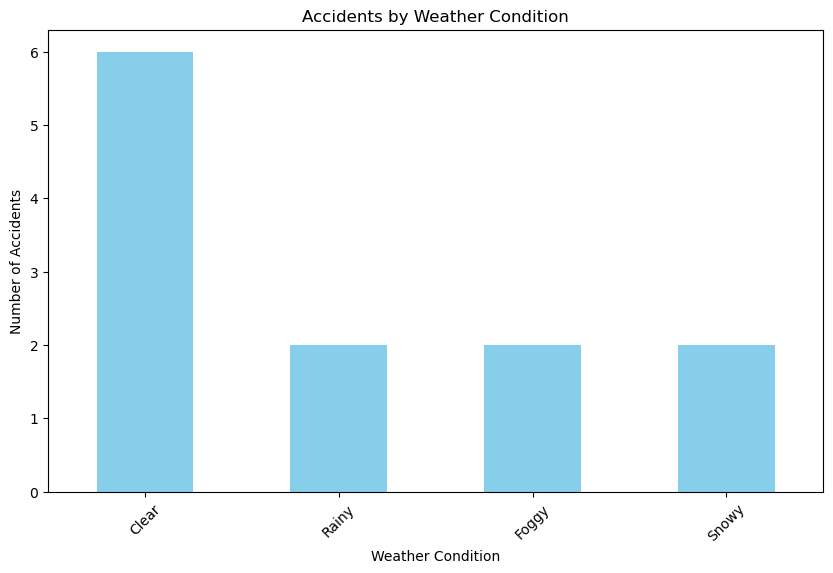

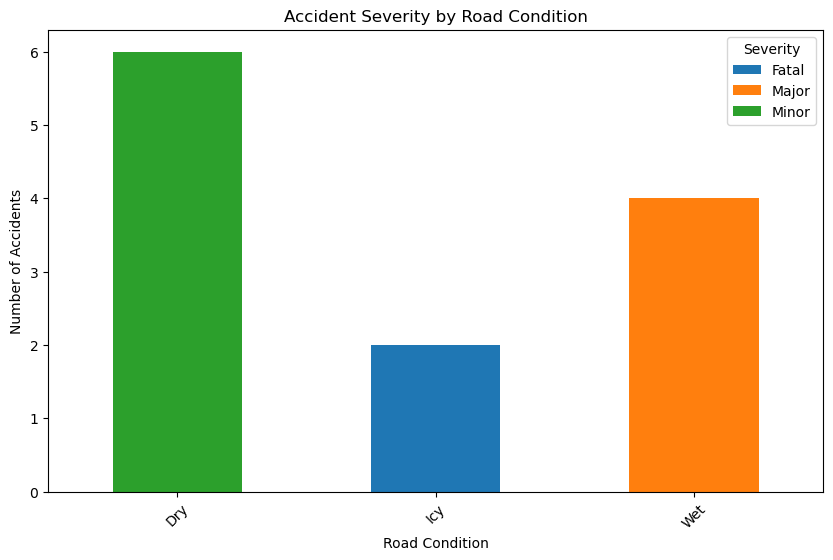

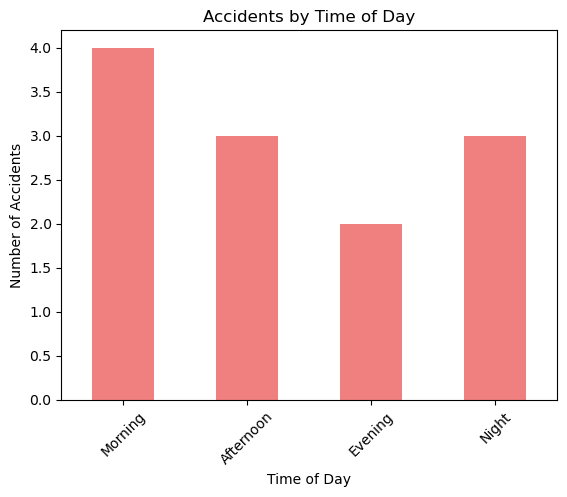

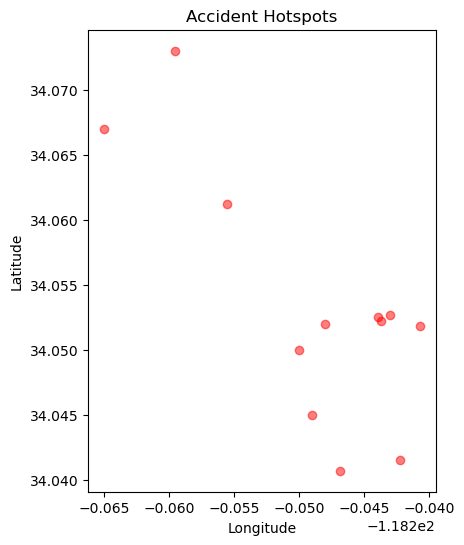

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime

# Create a simple dataset
data = {
    'timestamp': [
        '2024-12-01 08:30:00', '2024-12-01 09:00:00', '2024-12-01 14:30:00',
        '2024-12-01 18:00:00', '2024-12-01 20:30:00', '2024-12-02 07:45:00',
        '2024-12-02 13:15:00', '2024-12-02 16:00:00', '2024-12-02 22:30:00',
        '2024-12-03 06:30:00', '2024-12-03 17:00:00', '2024-12-03 19:30:00'
    ],
    'latitude': [
        34.0522, 34.0525, 34.0407, 34.0500, 34.0612, 34.0730, 34.0450, 34.0527, 34.0670, 34.0520, 34.0415, 34.0518
    ],
    'longitude': [
        -118.2437, -118.2439, -118.2468, -118.2500, -118.2555, -118.2595, -118.2490, -118.2430, -118.2650, -118.2480, -118.2422, -118.2407
    ],
    'road_condition': ['Dry', 'Wet', 'Icy', 'Dry', 'Wet', 'Dry', 'Wet', 'Dry', 'Icy', 'Dry', 'Wet', 'Dry'],
    'weather_condition': ['Clear', 'Rainy', 'Foggy', 'Clear', 'Snowy', 'Clear', 'Rainy', 'Clear', 'Foggy', 'Clear', 'Snowy', 'Clear'],
    'severity': ['Minor', 'Major', 'Fatal', 'Minor', 'Major', 'Minor', 'Major', 'Minor', 'Fatal', 'Minor', 'Major', 'Minor'],
    'time_of_day': ['Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Morning', 'Afternoon', 'Afternoon', 'Night', 'Morning', 'Evening', 'Night']
}

df = pd.DataFrame(data)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Visualizing accident distribution by weather condition
weather_counts = df['weather_condition'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accident severity by road condition
road_condition_severity = df.groupby(['road_condition', 'severity']).size().unstack().fillna(0)
road_condition_severity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

# Time of day accident trends
time_of_day_counts = df['time_of_day'].value_counts()
time_of_day_counts = time_of_day_counts.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
time_of_day_counts.plot(kind='bar', color='lightcoral')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Plotting accident locations on a map
import geopandas as gpd
from shapely.geometry import Point

# Convert dataframe to GeoDataFrame for spatial plotting
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(figsize=(10, 6), alpha=0.5, marker='o', color='red')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()